# Microsoft Stocks (MSFT)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preprocessing

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [4]:
import os

In [5]:
def preprocess_text(text):
    if isinstance(text, float) and pd.isna(text):
        text = ''
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

In [6]:
News_Data = 'DataSet/Microsoft_News_2023.csv'

In [7]:
def preprocess_and_save(file, is_train=True):
    if os.path.exists(file):
        df = pd.read_csv(file)
        df['Processed_Text'] = df['Headlines'].apply(preprocess_text) + ' ' + df['Summary'].apply(preprocess_text)
        df['Publication_Date'] = pd.to_datetime(df['Publication_Date']).dt.date
        df_grouped = df.groupby('Publication_Date')['Processed_Text'].apply(lambda texts: ' '.join(texts)).reset_index()
        return df_grouped
    else:
        print(f"No such file or directory: '{file}'")
        return pd.DataFrame()

In [8]:
import re
df_train = preprocess_and_save(News_Data, is_train=True)

In [9]:
print(df_train)

    Publication_Date                                     Processed_Text
0         2023-01-01  think question life begin tell u underlying de...
1         2023-01-02  california town rattled earthquake second time...
2         2023-01-03  going miss greed cynicism well nostalgic day c...
3         2023-01-04  race test limit democrat redstate survival str...
4         2023-01-05  democrat unusual upclose view desantis jared m...
..               ...                                                ...
360       2023-12-27  michael flynns rhode island hall fame inclusio...
361       2023-12-28  herbert kohl former wisconsin senator milwauke...
362       2023-12-29  maine join colorado finding trump ineligible p...
363       2023-12-30  willie ruff jazz missionary professor dy 92 ma...
364       2023-12-31  defying u pressure israel deepens gaza assault...

[365 rows x 2 columns]


In [10]:
df_train.rename(columns={'Publication_Date': 'Date'}, inplace=True)
df_train.rename(columns={'Processed_Text': 'News_Headlines'}, inplace=True)

In [11]:
print(df_train)

           Date                                     News_Headlines
0    2023-01-01  think question life begin tell u underlying de...
1    2023-01-02  california town rattled earthquake second time...
2    2023-01-03  going miss greed cynicism well nostalgic day c...
3    2023-01-04  race test limit democrat redstate survival str...
4    2023-01-05  democrat unusual upclose view desantis jared m...
..          ...                                                ...
360  2023-12-27  michael flynns rhode island hall fame inclusio...
361  2023-12-28  herbert kohl former wisconsin senator milwauke...
362  2023-12-29  maine join colorado finding trump ineligible p...
363  2023-12-30  willie ruff jazz missionary professor dy 92 ma...
364  2023-12-31  defying u pressure israel deepens gaza assault...

[365 rows x 2 columns]


In [12]:
df_train['Date'] = pd.to_datetime(df_train['Date']).dt.strftime('%d-%m-%Y')

In [13]:
print(df_train)

           Date                                     News_Headlines
0    01-01-2023  think question life begin tell u underlying de...
1    02-01-2023  california town rattled earthquake second time...
2    03-01-2023  going miss greed cynicism well nostalgic day c...
3    04-01-2023  race test limit democrat redstate survival str...
4    05-01-2023  democrat unusual upclose view desantis jared m...
..          ...                                                ...
360  27-12-2023  michael flynns rhode island hall fame inclusio...
361  28-12-2023  herbert kohl former wisconsin senator milwauke...
362  29-12-2023  maine join colorado finding trump ineligible p...
363  30-12-2023  willie ruff jazz missionary professor dy 92 ma...
364  31-12-2023  defying u pressure israel deepens gaza assault...

[365 rows x 2 columns]


In [14]:
df_train.to_csv('Processed_News_Data.csv', index=False)

In [15]:
Financial_Data=pd.read_csv('DataSet/MSFT_Financial_Data.csv')

In [16]:
print(Financial_Data)

           Date     Open      High       Low   Close    Volume
0    03-01-2023  243.080  245.7500  237.4000  239.58  25740036
1    04-01-2023  232.275  232.8700  225.9600  229.10  50623394
2    05-01-2023  227.200  227.5500  221.7602  222.31  39585623
3    06-01-2023  223.000  225.7601  219.3500  224.93  43613574
4    09-01-2023  226.450  231.2366  226.4100  227.12  27369784
..          ...      ...       ...       ...     ...       ...
245  22-12-2023  373.680  375.1800  372.7100  374.58  17107484
246  26-12-2023  375.000  376.9400  373.5000  374.66  12673050
247  27-12-2023  373.690  375.0600  372.8116  374.07  14872756
248  28-12-2023  375.370  376.4580  374.1600  375.28  14327013
249  29-12-2023  376.000  377.1600  373.4800  376.04  18730838

[250 rows x 6 columns]


In [17]:
Financial_Data.rename(columns={'Close': 'Stock_Price'}, inplace=True) # As the Closing Price of any Stock is its Stock Price on that day 

In [18]:
print(Financial_Data)

           Date     Open      High       Low  Stock_Price    Volume
0    03-01-2023  243.080  245.7500  237.4000       239.58  25740036
1    04-01-2023  232.275  232.8700  225.9600       229.10  50623394
2    05-01-2023  227.200  227.5500  221.7602       222.31  39585623
3    06-01-2023  223.000  225.7601  219.3500       224.93  43613574
4    09-01-2023  226.450  231.2366  226.4100       227.12  27369784
..          ...      ...       ...       ...          ...       ...
245  22-12-2023  373.680  375.1800  372.7100       374.58  17107484
246  26-12-2023  375.000  376.9400  373.5000       374.66  12673050
247  27-12-2023  373.690  375.0600  372.8116       374.07  14872756
248  28-12-2023  375.370  376.4580  374.1600       375.28  14327013
249  29-12-2023  376.000  377.1600  373.4800       376.04  18730838

[250 rows x 6 columns]


In [19]:
News_Data=pd.read_csv('Processed_News_Data.csv')

In [20]:
data_merged = pd.merge(Financial_Data, News_Data, left_on='Date', right_on='Date', how='left')

In [21]:
print(data_merged)

           Date     Open      High       Low  Stock_Price    Volume  \
0    03-01-2023  243.080  245.7500  237.4000       239.58  25740036   
1    04-01-2023  232.275  232.8700  225.9600       229.10  50623394   
2    05-01-2023  227.200  227.5500  221.7602       222.31  39585623   
3    06-01-2023  223.000  225.7601  219.3500       224.93  43613574   
4    09-01-2023  226.450  231.2366  226.4100       227.12  27369784   
..          ...      ...       ...       ...          ...       ...   
245  22-12-2023  373.680  375.1800  372.7100       374.58  17107484   
246  26-12-2023  375.000  376.9400  373.5000       374.66  12673050   
247  27-12-2023  373.690  375.0600  372.8116       374.07  14872756   
248  28-12-2023  375.370  376.4580  374.1600       375.28  14327013   
249  29-12-2023  376.000  377.1600  373.4800       376.04  18730838   

                                        News_Headlines  
0    going miss greed cynicism well nostalgic day c...  
1    race test limit democrat red

In [22]:
# To Add the Sentiment Scores of News_Headlines
data_merged["Positive"]=""
data_merged["Negative"]=""
data_merged["Neutral"]=""

In [23]:
print(data_merged)

           Date     Open      High       Low  Stock_Price    Volume  \
0    03-01-2023  243.080  245.7500  237.4000       239.58  25740036   
1    04-01-2023  232.275  232.8700  225.9600       229.10  50623394   
2    05-01-2023  227.200  227.5500  221.7602       222.31  39585623   
3    06-01-2023  223.000  225.7601  219.3500       224.93  43613574   
4    09-01-2023  226.450  231.2366  226.4100       227.12  27369784   
..          ...      ...       ...       ...          ...       ...   
245  22-12-2023  373.680  375.1800  372.7100       374.58  17107484   
246  26-12-2023  375.000  376.9400  373.5000       374.66  12673050   
247  27-12-2023  373.690  375.0600  372.8116       374.07  14872756   
248  28-12-2023  375.370  376.4580  374.1600       375.28  14327013   
249  29-12-2023  376.000  377.1600  373.4800       376.04  18730838   

                                        News_Headlines Positive Negative  \
0    going miss greed cynicism well nostalgic day c...                 

In [24]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [25]:
def get_sentiment_scores(text):
    scores = sentiment.polarity_scores(text)
    return scores['pos'], scores['neg'], scores['neu']

In [26]:
data_merged[['Positive', 'Negative', 'Neutral']] = data_merged['News_Headlines'].apply(lambda text: pd.Series(get_sentiment_scores(text)))

In [27]:
print(data_merged)

           Date     Open      High       Low  Stock_Price    Volume  \
0    03-01-2023  243.080  245.7500  237.4000       239.58  25740036   
1    04-01-2023  232.275  232.8700  225.9600       229.10  50623394   
2    05-01-2023  227.200  227.5500  221.7602       222.31  39585623   
3    06-01-2023  223.000  225.7601  219.3500       224.93  43613574   
4    09-01-2023  226.450  231.2366  226.4100       227.12  27369784   
..          ...      ...       ...       ...          ...       ...   
245  22-12-2023  373.680  375.1800  372.7100       374.58  17107484   
246  26-12-2023  375.000  376.9400  373.5000       374.66  12673050   
247  27-12-2023  373.690  375.0600  372.8116       374.07  14872756   
248  28-12-2023  375.370  376.4580  374.1600       375.28  14327013   
249  29-12-2023  376.000  377.1600  373.4800       376.04  18730838   

                                        News_Headlines  Positive  Negative  \
0    going miss greed cynicism well nostalgic day c...     0.114     

In [28]:
merge_df=pd.DataFrame(data_merged)

In [29]:
def sentiment_catag(text):
    scores = sentiment.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [30]:
merge_df['Sentiment'] = merge_df['News_Headlines'].apply(sentiment_catag)

In [31]:
print(merge_df)

           Date     Open      High       Low  Stock_Price    Volume  \
0    03-01-2023  243.080  245.7500  237.4000       239.58  25740036   
1    04-01-2023  232.275  232.8700  225.9600       229.10  50623394   
2    05-01-2023  227.200  227.5500  221.7602       222.31  39585623   
3    06-01-2023  223.000  225.7601  219.3500       224.93  43613574   
4    09-01-2023  226.450  231.2366  226.4100       227.12  27369784   
..          ...      ...       ...       ...          ...       ...   
245  22-12-2023  373.680  375.1800  372.7100       374.58  17107484   
246  26-12-2023  375.000  376.9400  373.5000       374.66  12673050   
247  27-12-2023  373.690  375.0600  372.8116       374.07  14872756   
248  28-12-2023  375.370  376.4580  374.1600       375.28  14327013   
249  29-12-2023  376.000  377.1600  373.4800       376.04  18730838   

                                        News_Headlines  Positive  Negative  \
0    going miss greed cynicism well nostalgic day c...     0.114     

In [32]:
sentiment_counts = merge_df['Sentiment'].value_counts(normalize=True) * 100

In [33]:
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['red', 'lightgreen', 'lightskyblue']
explode = (0, 0, 0)

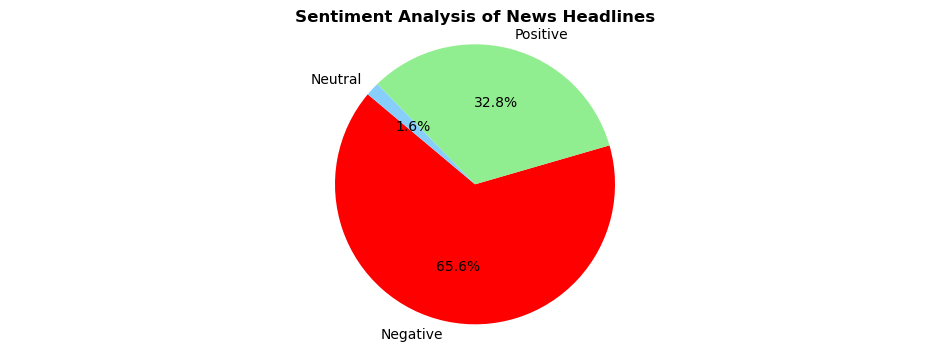

In [34]:
plt.figure(figsize=(12, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Sentiment Analysis of News Headlines',fontweight='bold')
plt.show()

### Splitting Data into Training (75%) and Testing Dataset (25%)

In [39]:
start_train='0' #Indexes
end_train='185'
start_test='186'
end_test='249'

In [40]:
train = merge_df.loc[start_train : end_train,:] #Training Dataset
test = merge_df.loc[start_test:end_test,:] #Testing Dataset

### Creating Movement Column

In [35]:
merge_df['Movement'] = merge_df['Positive'] - merge_df['Negative']

In [36]:
threshold = 0.0 #Threshold for Classification

In [37]:
merge_df['Movement'] = merge_df['Movement'].apply(lambda x: 1 if x > threshold else 0)

In [38]:
print(merge_df[['Date','Stock_Price', 'Positive', 'Negative', 'Movement']])

           Date  Stock_Price  Positive  Negative  Movement
0    03-01-2023       239.58     0.114     0.144         0
1    04-01-2023       229.10     0.144     0.158         0
2    05-01-2023       222.31     0.148     0.137         1
3    06-01-2023       224.93     0.138     0.168         0
4    09-01-2023       227.12     0.148     0.147         1
..          ...          ...       ...       ...       ...
245  22-12-2023       374.58     0.153     0.134         1
246  26-12-2023       374.66     0.156     0.124         1
247  27-12-2023       374.07     0.168     0.152         1
248  28-12-2023       375.28     0.142     0.161         0
249  29-12-2023       376.04     0.137     0.135         1

[250 rows x 5 columns]


## Models

### Using Model that Achieved High Accuracy in Google Stock Analysis

#### Random Forest Classifier Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [42]:
rf=RandomForestClassifier(random_state=42)

In [43]:
X_train = train[['Open', 'High', 'Low', 'Volume', 'Positive', 'Negative','Neutral']]
y_train = train['Movement']

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
X_test = test[['Open', 'High', 'Low', 'Volume', 'Positive', 'Negative','Neutral']]

In [46]:
predictions_rf = rf.predict(X_test)
predictions_prob_rf = rf.predict_proba(X_test)[:, 1]

In [47]:
accuracy_rf = accuracy_score(test['Movement'], predictions_rf)
precision_rf = precision_score(test['Movement'], predictions_rf)

In [48]:
recall_rf = recall_score(test['Movement'], predictions_rf)
f1_rf = f1_score(test['Movement'], predictions_rf)
roc_auc_rf = roc_auc_score(test['Movement'], predictions_prob_rf)

In [49]:
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-score: {f1_rf}")
print(f"Random Forest ROC AUC: {roc_auc_rf}")

Random Forest Accuracy: 0.96875
Random Forest Precision: 0.9230769230769231
Random Forest Recall: 1.0
Random Forest F1-score: 0.9600000000000001
Random Forest ROC AUC: 0.996875


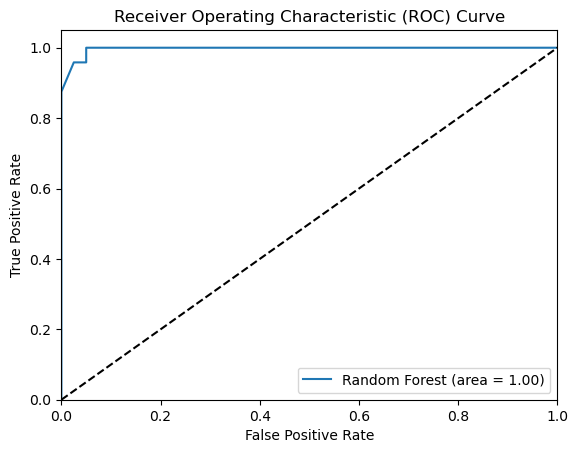

In [50]:
fpr_rf, tpr_rf, _ = roc_curve(test['Movement'], predictions_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
matrix = confusion_matrix(test['Movement'], predictions_rf)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[38  2]
 [ 0 24]]


In [52]:
report = classification_report(test['Movement'], predictions_rf)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.92      1.00      0.96        24

    accuracy                           0.97        64
   macro avg       0.96      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



In [55]:
daily_returns = test['Movement'].shift(-1) * predictions_rf - 1
daily_returns.fillna(0, inplace=True)

sharpe_ratio = daily_returns.mean() / daily_returns.std()
annual_sharpe_ratio = sharpe_ratio * np.sqrt(252)  # Assuming 252 trading days in a year

print(f"Sharpe Ratio: {sharpe_ratio:.2f} (Daily)")
print(f"Annualized Sharpe Ratio: {annual_sharpe_ratio:.2f}")

Sharpe Ratio: -1.79 (Daily)
Annualized Sharpe Ratio: -28.47


In [56]:
cumulative_returns = daily_returns.cumsum()

max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

print(f"Maximum Drawdown: {max_drawdown:.2%}")


Maximum Drawdown: 0.00%


In [57]:
num_trades = predictions_rf.sum()  # Assuming predictions_rf are binary decisions (1 for buy, 0 for sell/hold)

print(f"Number of Trades Executed: {num_trades}")


Number of Trades Executed: 26


In [58]:
win_ratio = (predictions_rf * test['Movement']).sum() / num_trades

print(f"Win Ratio: {win_ratio:.2%}")


Win Ratio: 92.31%


## Predicting Stock Prices

### Using Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [60]:
dt=DecisionTreeRegressor(random_state=42)

In [61]:
X_train = train[['Open', 'High', 'Low', 'Volume', 'Positive', 'Negative', 'Neutral','Movement']]
Y_train = train['Stock_Price']

In [62]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [63]:
X_test = test[['Open', 'High', 'Low', 'Volume', 'Positive', 'Negative','Neutral','Movement']]

In [64]:
predictions_dt = dt.predict(X_test)

In [65]:
mse_dt = mean_squared_error(test['Stock_Price'], predictions_dt)
mae_dt = mean_absolute_error(test['Stock_Price'], predictions_dt)

In [66]:
predictions_df_dt = pd.DataFrame({
    'Date': test.index,
    'Predicted_Price_DT': predictions_dt,
    'Actual_Price': test['Stock_Price'].values
})

In [67]:
print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree Mean Absolute Error: {mae_dt}")

Decision Tree Mean Squared Error: 117.17737226562491
Decision Tree Mean Absolute Error: 8.731171874999996


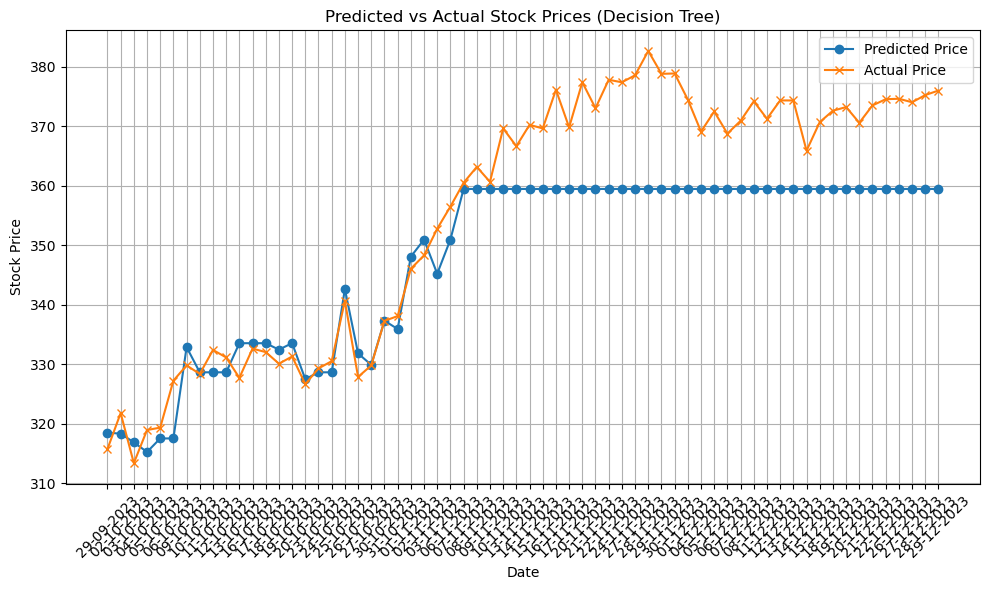

In [68]:
dates = test['Date']
plt.figure(figsize=(10, 6))
plt.plot(dates, predictions_dt, label='Predicted Price', marker='o')
plt.plot(dates, test['Stock_Price'], label='Actual Price', marker='x')
plt.title('Predicted vs Actual Stock Prices (Decision Tree)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('time_series_plot_decision_tree.png')
plt.show()


R-squared (Decision Tree): 0.7472270917682833


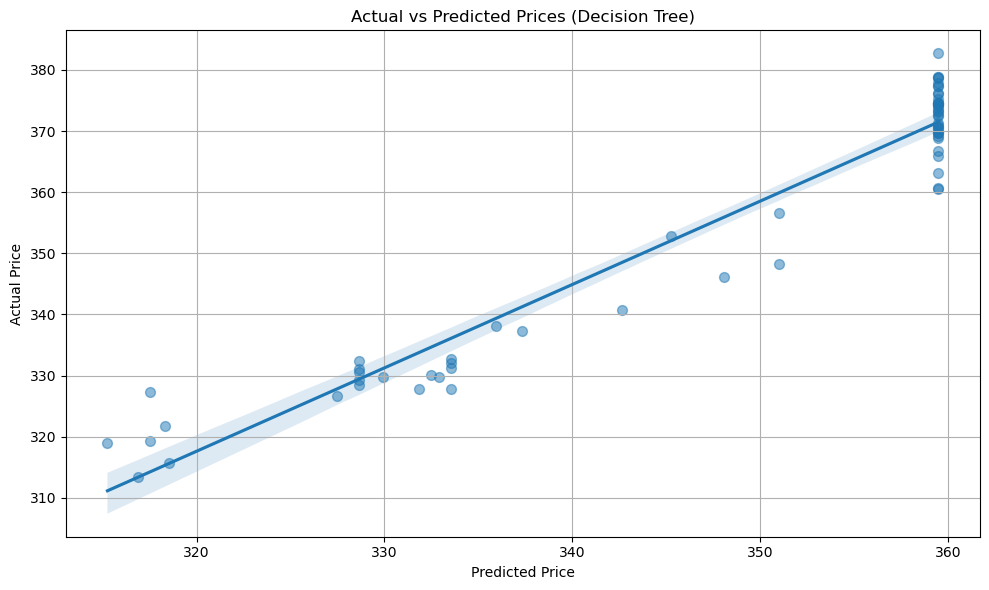

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
r2 = r2_score(test['Stock_Price'], predictions_dt)
print(f"R-squared (Decision Tree): {r2}")
plt.figure(figsize=(10, 6))
sns.regplot(x=predictions_df_dt['Predicted_Price_DT'], y=predictions_df_dt['Actual_Price'], scatter_kws={'s': 50, 'alpha': 0.5})
plt.title('Actual vs Predicted Prices (Decision Tree)')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_plot_decision_tree.png')
plt.show()